# Командная работа
Выполнили Воробьев Артем и Муфтахутдинов Алмаз

# Подключение библиотек📚

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering

### Читаем наш Датасет

In [2]:
df = pd.read_csv('student_performance_updated_1000.csv')

# Описание предметной области

In [3]:
df.head(10)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


- StudentId - уникальный индентификатор студента
- Name - Имя студента
- Gender - пол студента
- AttenndanceRate - рейтинг посещаемости
- StudyHoursPerWeek - количество часов обучения в неделю
- PreviousGrade - предварительная оценка
- ExtracurricularActivities - внеклассные занятия
- ParentalSupport - родительская поддержка
- FinalGrade - финальная оценка
- Study Hours - часы обучения
- Attendance (%)  - посещаемость

Большинство атрибутов имеют тип данных: 'float64' и некоторые объекты: 'object'.
В нашем датасете имеется 1000 записей. На каждый атрибут отсутствует в среднем 35 записей. Не такое большое количество пропусков, но надо выявить значимость атрибута и понять, стоит их удалять или нет.

In [5]:
df.duplicated().sum()

np.int64(0)

Дубликаты отсутствуют. Это очень хорошо✅

In [6]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

Заменим медианой такие атрибуты как рейтинг посещаемости

In [8]:
cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade', 'Study Hours', 'Attendance (%)']

medians = df[cols].median()
print(medians)

AttendanceRate       88.0
StudyHoursPerWeek    18.0
PreviousGrade        78.0
FinalGrade           80.0
Study Hours           2.5
Attendance (%)       76.0
dtype: float64


In [9]:
# Заполняем пропуски медианой для числовых колонок
df['AttendanceRate'].fillna(medians['AttendanceRate'], inplace=True)
df['StudyHoursPerWeek'].fillna(medians['StudyHoursPerWeek'], inplace=True)
df['PreviousGrade'].fillna(medians['PreviousGrade'], inplace=True)
df['FinalGrade'].fillna(medians['FinalGrade'], inplace=True)
df['Study Hours'].fillna(medians['Study Hours'], inplace=True)
df['Attendance (%)'].fillna(medians['Attendance (%)'], inplace=True)

# Проверяем, что пропусков больше нет
print("Пропусков после заполнения:", df.isnull().sum().sum())

Пропусков после заполнения: 212


C:\Users\almaz\AppData\Local\Temp\ipykernel_1752\1617280203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AttendanceRate'].fillna(medians['AttendanceRate'], inplace=True)
C:\Users\almaz\AppData\Local\Temp\ipykernel_1752\1617280203.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
# БАЗОВАЯ СТАТИСТИКА 
print("=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df.describe())

# РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 
print("\n=== РАСПРЕДЕЛЕНИЕ FINALGRADE ===")
print(f"Средняя оценка: {df['FinalGrade'].mean():.2f}")
print(f"Медиана: {df['FinalGrade'].median():.2f}")
print(f"Стандартное отклонение: {df['FinalGrade'].std():.2f}")
print(f"Мин: {df['FinalGrade'].min():.2f}, Макс: {df['FinalGrade'].max():.2f}")

=== ОСНОВНАЯ СТАТИСТИКА ===
         StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   960.000000     1000.000000        1000.000000    1000.000000   
mean   5416.019792       85.610000          17.649000      77.612000   
std    2653.748319        7.200399           6.113688       9.840238   
min       1.000000       70.000000           8.000000      60.000000   
25%    3113.500000       82.000000          12.000000      70.000000   
50%    5396.500000       88.000000          18.000000      78.000000   
75%    7754.750000       91.000000          22.000000      86.000000   
max    9998.000000       95.000000          30.000000      90.000000   

       ExtracurricularActivities   FinalGrade  Study Hours  Attendance (%)  
count                 957.000000  1000.000000  1000.000000     1000.000000  
mean                    1.520376    80.029000     2.409200       77.197000  
std                     1.046439     9.301649     1.600749       18.899613  
min            

<Figure size 1200x800 with 0 Axes>

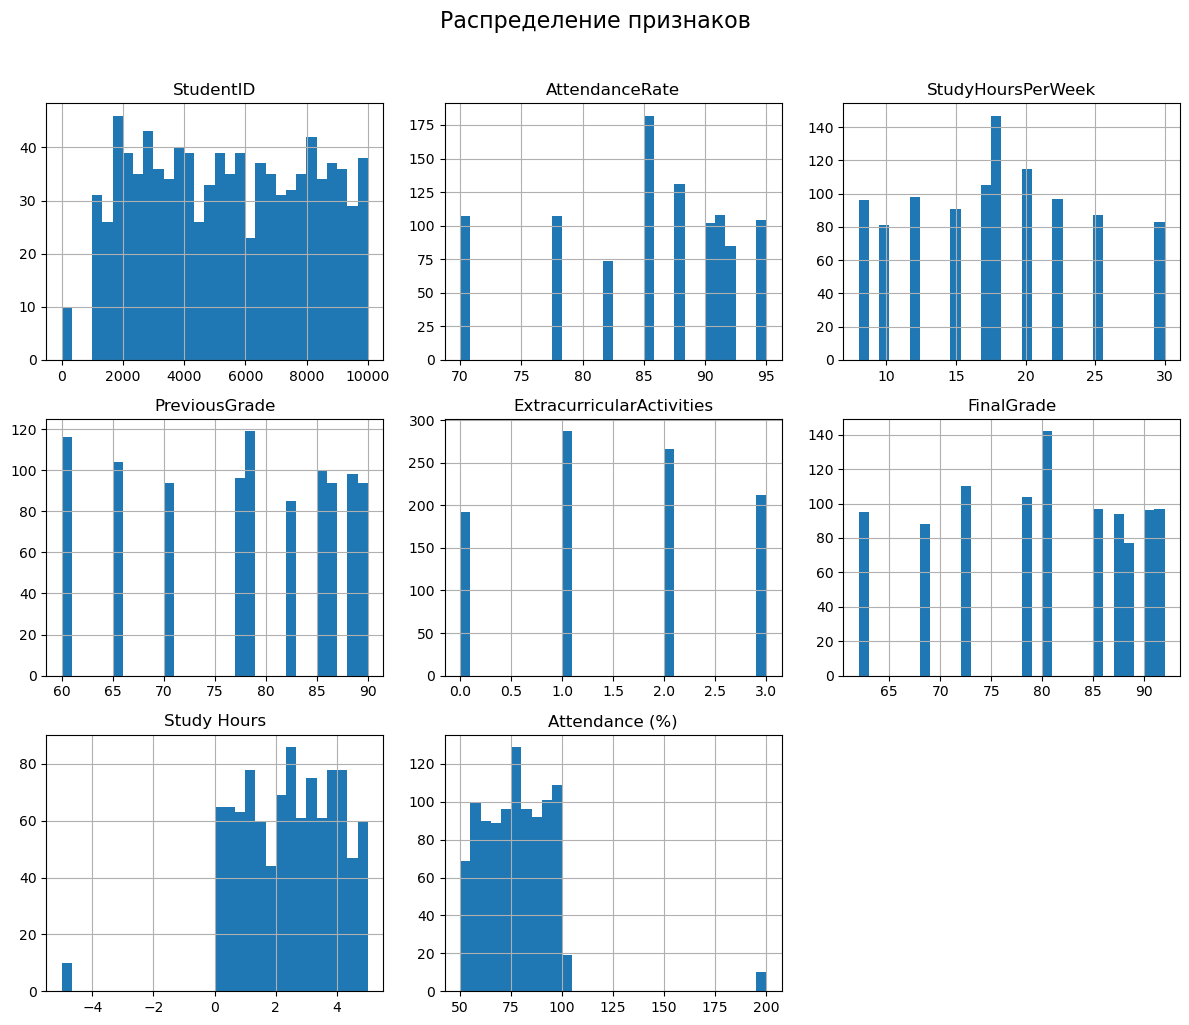

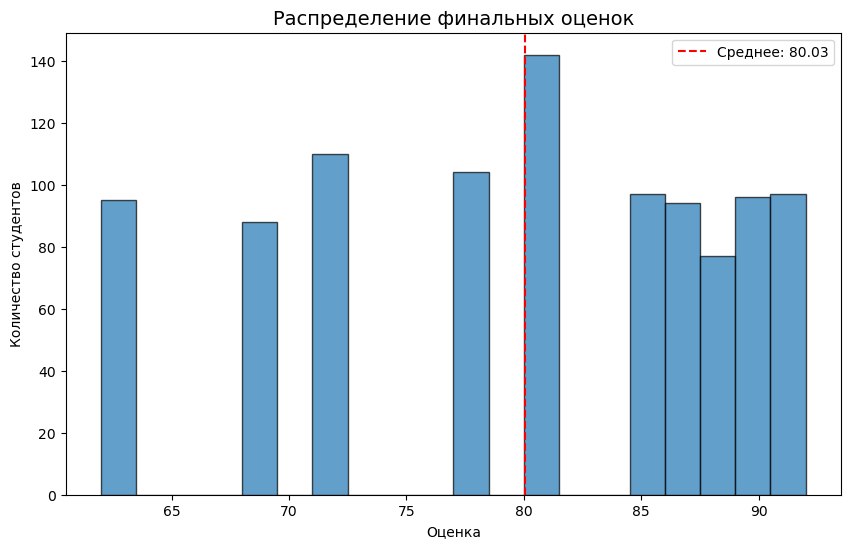

In [12]:
# ===== ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ =====
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 10))
plt.suptitle('Распределение признаков', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ===== ГРАФИК FINALGRADE =====
plt.figure(figsize=(10, 6))
plt.hist(df['FinalGrade'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение финальных оценок', fontsize=14)
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.axvline(df['FinalGrade'].mean(), color='red', linestyle='--', label=f'Среднее: {df["FinalGrade"].mean():.2f}')
plt.legend()
plt.show()

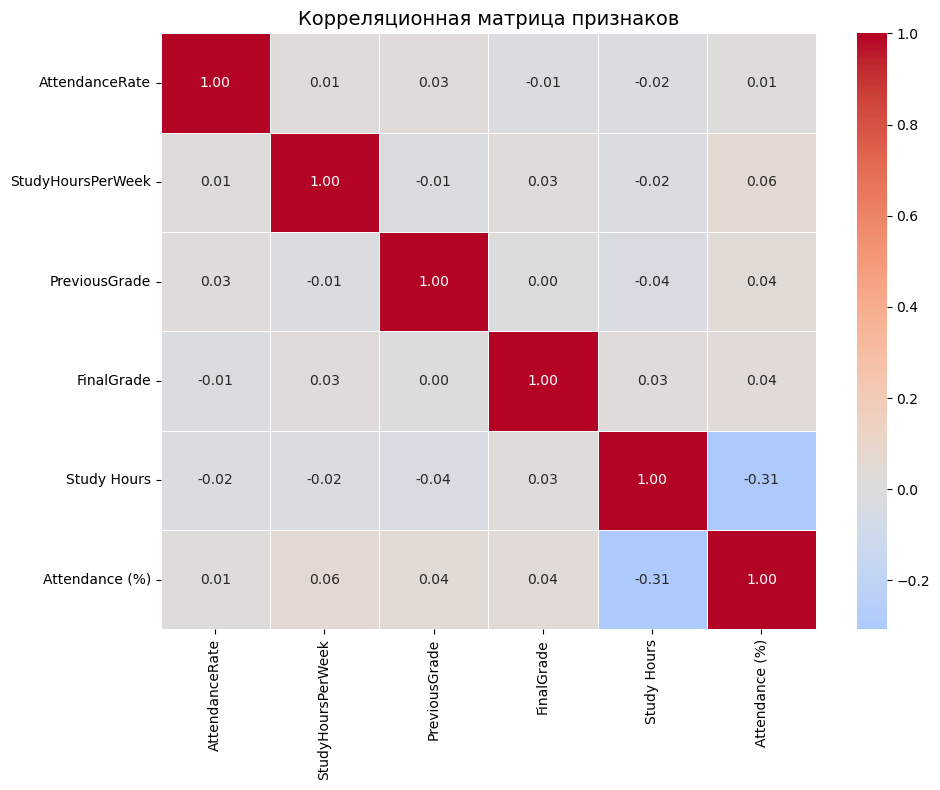


=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===
FinalGrade           1.000000
Attendance (%)       0.039404
StudyHoursPerWeek    0.034574
Study Hours          0.030161
PreviousGrade        0.003830
AttendanceRate      -0.011115
Name: FinalGrade, dtype: float64


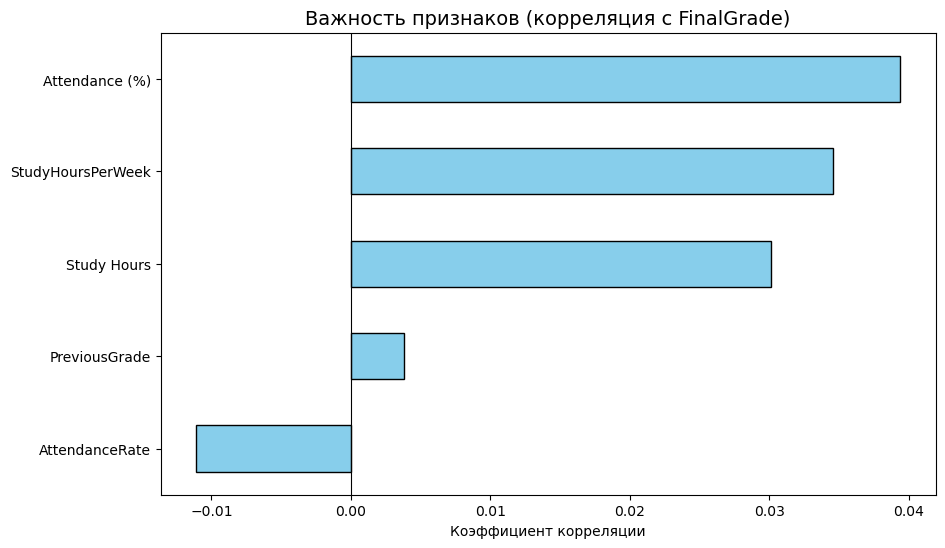

In [13]:
# ===== КОРРЕЛЯЦИОННАЯ МАТРИЦА =====
plt.figure(figsize=(10, 8))
correlation_matrix = df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade', 'Study Hours', 'Attendance (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков', fontsize=14)
plt.tight_layout()
plt.show()

# ===== КОРРЕЛЯЦИЯ С FINALGRADE =====
print("\n=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===")
numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'Study Hours', 'Attendance (%)']
correlations = df[numeric_cols + ['FinalGrade']].corr()['FinalGrade'].sort_values(ascending=False)
print(correlations)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
correlations.drop('FinalGrade').plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Важность признаков (корреляция с FinalGrade)', fontsize=14)
plt.xlabel('Коэффициент корреляции')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()